# Building a Random Forest Classifier from Decision Trees with Scikit-Learn

<h2> Creating a dataset </h2>

In [1]:
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=10000, noise=0.4)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [5]:
import matplotlib.pyplot as plt

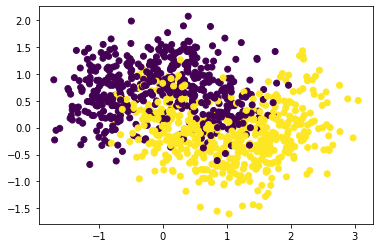

In [6]:
plt.scatter(X_train[:1000,0], X_train[:1000,1], c=y_train[:1000])

<h2> Training a Decision Tree Classifier </h2>

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
tree_clf = DecisionTreeClassifier()

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = [{
    'max_depth': range(1,5),
    'min_samples_split': range(1,5),
    'min_samples_leaf': range(1,5),
    'max_leaf_nodes': range(1, 20),
    'ccp_alpha': [0.0, 0.001, 0.01]
}]

In [11]:
grid_search = GridSearchCV(tree_clf, param_grid, scoring = "accuracy",
                          cv = 10, n_jobs=4, return_train_score=True)

In [12]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid=[{'ccp_alpha': [0.0, 0.001, 0.01],
                          'max_depth': range(1, 5),
                          'max_leaf_nodes': range(1, 20),
                          'min_samples_leaf': range(1, 5),
                          'min_samples_split': range(1, 5)}],
             return_train_score=True, scoring='accuracy')

In [13]:
grid_search.best_params_

{'ccp_alpha': 0.0,
 'max_depth': 2,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [14]:
tree_clf = grid_search.best_estimator_

In [15]:
tree_pred = tree_clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test, tree_pred)

0.862

86.2% Accuracy to beat...

<h2> Building a Random Forest Classifier </h2>

In [18]:
X_subsets, y_subsets = [], []

In [19]:
from numpy.random import randint

In [20]:
i = 0
for i in range(len(X_train)):
    rand = randint(0, len(X_train)-101)
    X_subsets.append(X[rand:rand+100])
    y_subsets.append(y[rand:rand+100])
    i += 1

In [21]:
forest = []
accuracies = []
i = 0
for i in range(len(X_subsets)):
    tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=13, min_samples_leaf=4, min_samples_split=2, ccp_alpha=0.025)
    tree.fit(X_subsets[i], y_subsets[i])
    forest.append(tree)
    predictions = tree.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    i += 1

In [22]:
from numpy import mean

In [23]:
mean(accuracies)

0.8240825066666667

In [24]:
i = 0
prediction_matrix = []
for tree in forest:
    prediction_matrix.append(tree.predict(X_test))

In [25]:
from scipy.stats import mode

In [26]:
predictions = mode(prediction_matrix, axis=0).mode[0]

In [27]:
accuracy_score(y_test, predictions)

0.868

Final accuracy of 86.8%!